In [1]:
#Libraries        
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Read the data from the file
sales_data= pd.read_csv("advertising.csv")

In [3]:
sales_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [4]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#Data Cleaning
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

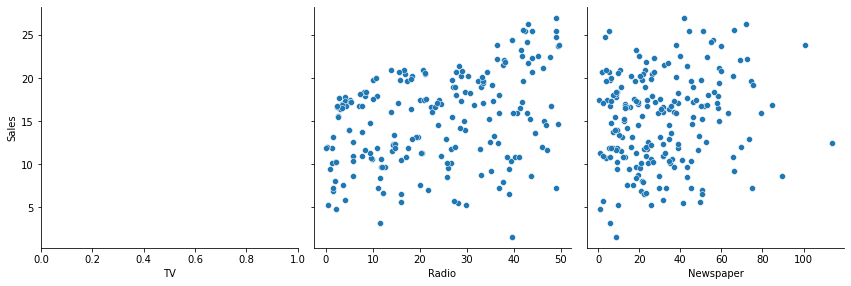

In [6]:
#Data Visualization with respect to Sales
sns.pairplot(sales_data, x_vars=['TV','Radio','Newspaper'], 
             y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

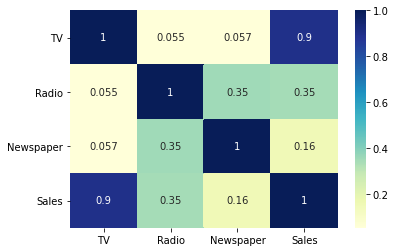

In [7]:
sns.heatmap(sales_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [8]:
# Hence TV seems to be most correlated to Sales
X=sales_data['TV']
y=sales_data['Sales']

In [9]:
#Split the DataSet
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [10]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr_pred = sm.OLS(y_train, X_train_sm).fit()

In [11]:
lr_pred.params

const    6.995533
TV       0.054105
dtype: float64

In [12]:
lr_pred.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           5.03e-61
Time:                        19:22:54   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.000       6.318       7.673
TV             0.0541      0.002     26.976      0.000       0.050       0.058
==============================================================================
Omnibus:                        0.122   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.941   Jarque-Bera (JB):                0.029
Skew:                           0.032   Prob(JB):                        0.986
Kurtosis:                       3.014   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

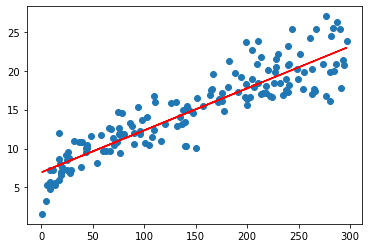

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Model Evaluation

In [14]:
y_train_pred = lr_pred.predict(X_train_sm)
res = (y_train - y_train_pred)

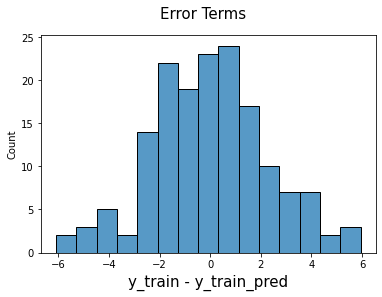

In [15]:
fig = plt.figure()
sns.histplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         
plt.show()

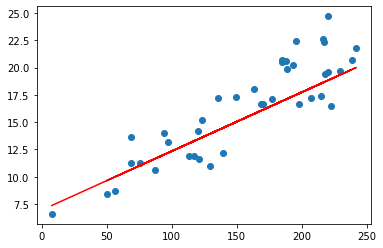

In [16]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()
